In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regressiondata/sample_submission.csv
/kaggle/input/regressiondata/data_description.txt
/kaggle/input/regressiondata/train.csv
/kaggle/input/regressiondata/test.csv


In [2]:
import os 
import sklearn
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import math
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error
from catboost import CatBoostRegressor



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from numpy.random import seed
seed(123456)

import warnings 
warnings.filterwarnings("ignore") 

In [3]:
df = pd.read_csv('/kaggle/input/regressiondata/train.csv')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in training set')

There are 1460 rows and 81 columns in training set


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

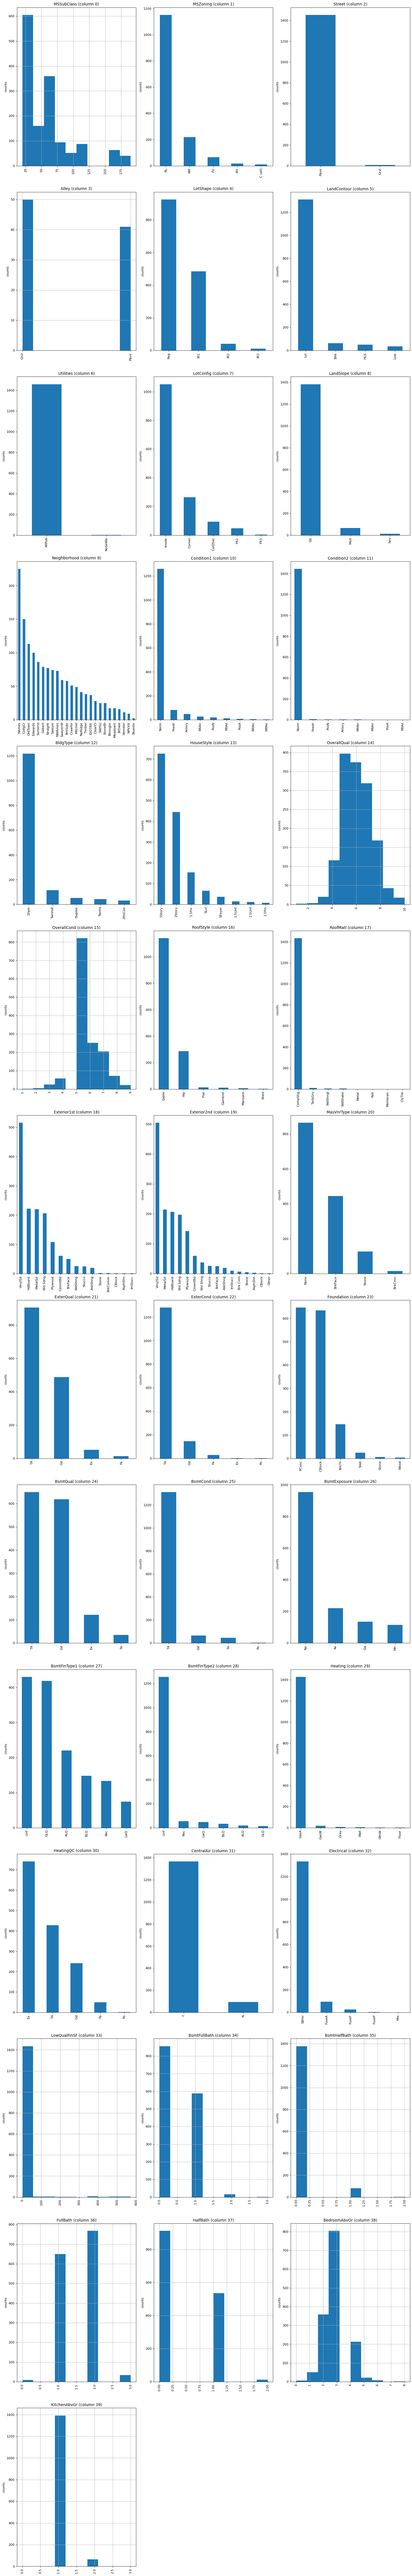

In [5]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
plotPerColumnDistribution(df, 40, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
numeric_columns = df.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
disc_num_col = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

cont_num_col = []
for i in numeric_columns:
    if i not in disc_num_col:
        cont_num_col.append(i)

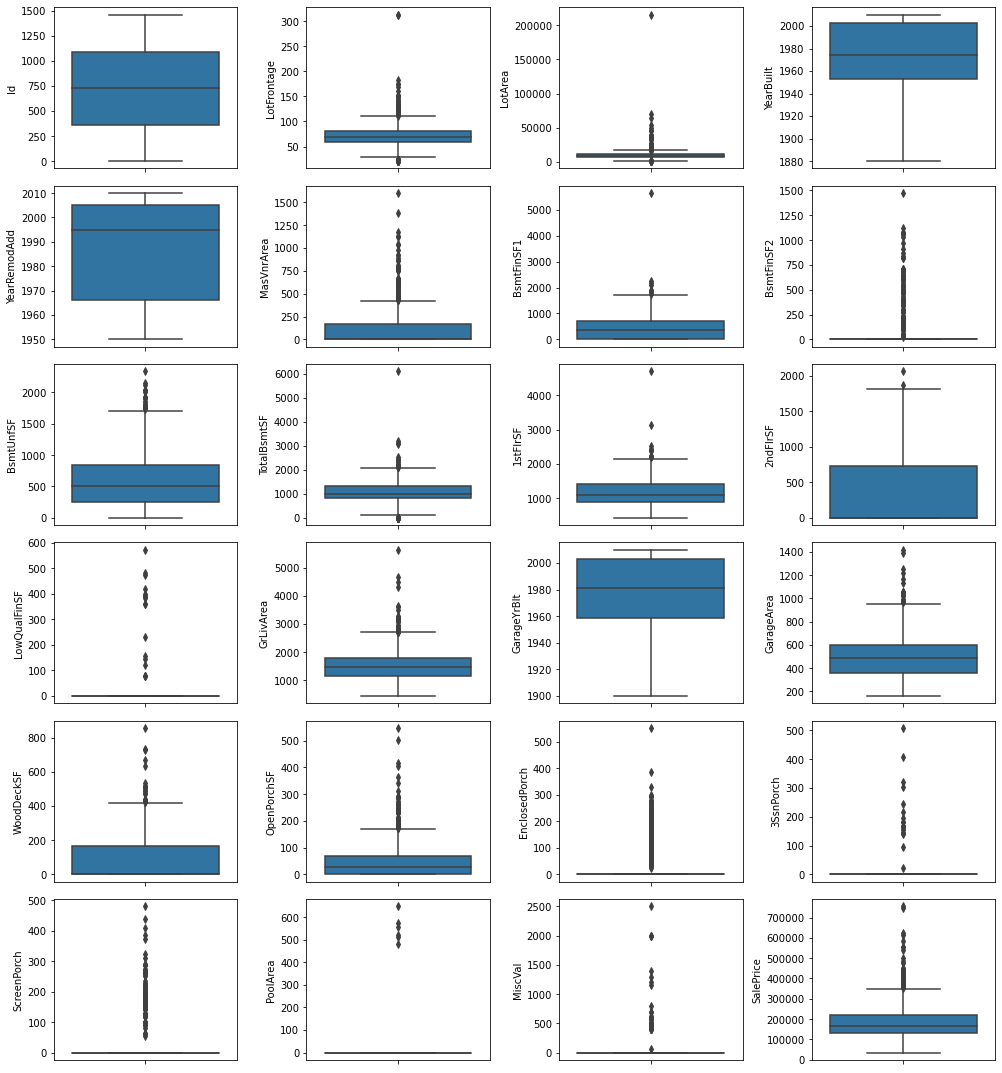

In [8]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_col):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_columns.dropna())
fig.tight_layout(pad=1.0)

****Görselleştirmeler sonucunda bazı kolonlarda outlier olduğunu görüyorum.Bunlara yakından bakmak istiyorum.

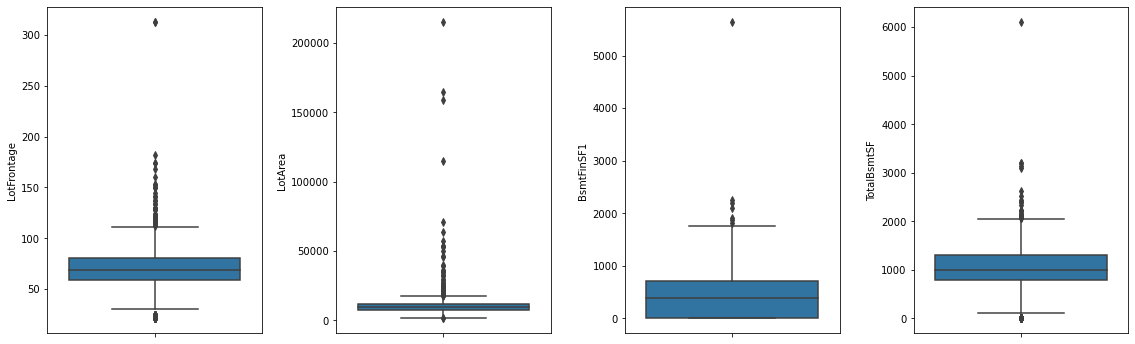

In [9]:
out_col = ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF']
fig = plt.figure(figsize=(20,5))
for index,col in enumerate(out_col):
    plt.subplot(1,5,index+1)
    sns.boxplot(y=col, data=df)
fig.tight_layout(pad=1.5)

In [10]:
df = df.drop(df[df['1stFlrSF'] > 4000].index)
df = df.drop(df[df['BsmtFinSF1'] > 4000].index)
df = df.drop(df[df['LotArea'] > 100000].index)
df = df.drop(df[df['LotFrontage'] > 200].index)
df = df.drop(df[df['TotalBsmtSF'] > 4000].index)

****Boxplotların dışında çıkan ve modelimi kötü etkileyecek olan outlier değerlerini drop ettim

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1448,0.995873
MiscFeature,1402,0.964237
Alley,1363,0.937414
Fence,1173,0.806740
FireplaceQu,690,0.474553
LotFrontage,256,0.176066
GarageCond,81,0.055708
GarageType,81,0.055708
GarageYrBlt,81,0.055708
GarageFinish,81,0.055708


In [12]:
for cat in ['GarageType', 'GarageFinish','GarageQual', 'GarageCond',
              'BsmtFinType1','BsmtQual','BsmtCond', 'BsmtExposure', 
              'BsmtFinType2','MiscFeature','Alley','Fence','FireplaceQu',
               'MasVnrType', 'PoolQC','Fence'] :
    df[cat].fillna('None',inplace=True)

In [13]:
for num in ['MasVnrArea','BsmtFullBath','BsmtHalfBath'
              ,'BsmtFinSF1','GarageCars','GarageArea','TotalBsmtSF',
             'BsmtUnfSF','BsmtFinSF2','GarageYrBlt','TotalBsmtSF']:
    df[num].fillna(0,inplace=True) 

In [14]:
df['Functional'].fillna(df['Functional'].mode()[0],inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0],inplace=True)
df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0],inplace=True)
df['MSZoning'].fillna(df['MSZoning'].mode()[0],inplace=True)
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0],inplace=True)
df['SaleType'].fillna(df['SaleType'].mode()[0],inplace=True)
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [15]:
df.isnull().values.any()

False

****Missing values kalmadı.

In [16]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].apply(str)
df['MoSold'] = df['MoSold'].apply(str)

****Bu kolonları string e çevirme sebebi aslında numeric gibi gözüküyor fakat kategorik bileşenlerden oluşuyor.Continious olmamasında anlaşılıyor

# ****Feature Engineering

In [17]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df["SqFtPerRoom"] = df["GrLivArea"] / (df["TotRmsAbvGrd"] + df["FullBath"] + df["HalfBath"] + df["KitchenAbvGr"])
df['Total_Home_Quality'] = df['OverallQual'] + df['OverallCond']
df['Total_Bathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
df["TotalGarageQual"] = df[["GarageQual", "GarageCond"]].sum(axis = 1)
df['Haspool'] = df['PoolArea'].apply(lambda x: 'Y' if x > 0 else 'N')
df['Has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 'Y' if x > 0 else 'N')
df['Hasgarage'] = df['GarageArea'].apply(lambda x: 'Y' if x > 0 else 'N')
df['Hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 'Y' if x > 0 else 'N')
df['Hasfireplace'] = df['Fireplaces'].apply(lambda x: 'Y' if x > 0 else 'N')

In [18]:
drop_list = ['Street', 'Utilities', 'LandSlope', 'MiscFeature', 'PoolArea','GarageYrBlt','GarageCars','KitchenAbvGr','EnclosedPorch','GrLivArea','Id']
df.drop(drop_list, axis=1, inplace=True)

In [19]:
ordinal_fields_with_labelencoder=['YearBuilt','YearRemodAdd','CentralAir','PavedDrive','YrSold']

for field in ordinal_fields_with_labelencoder:
    le = LabelEncoder()
    df[field] = le.fit_transform(df[field].values)

In [20]:
ExterQual_val = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
ExterCond_val = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
BsmtQual_val = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0}
BsmtCond_val = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0}
BsmtExposure_val = {'Gd': 4,'Av': 3,'Mn': 2,'No': 1,'None': 0}
BsmtFinType1_val = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'None': 0}
BsmtFinType2_val = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'None': 0}
HeatingQC_val = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
KitchenQual_val = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2}
FireplaceQu_val = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0}
GarageQual_val = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0}
GarageCond_val = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0}
PoolQC_val = {'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'None': 0}
LotShape_val = {'Reg':0,'IR1':1 ,'IR2':2,'IR3':3}
GarageFinish_val = {'None':0,'Unf':1,'RFn':2,'Fin':3}
Fence_val = {'None':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}

              
            
# mapping
df['ExterQual']= df['ExterQual'].map(ExterQual_val)
df['ExterCond']= df['ExterCond'].map(ExterCond_val)
df['BsmtQual']= df['BsmtQual'].map(BsmtQual_val)
df['BsmtCond']= df['BsmtCond'].map(BsmtCond_val)
df['BsmtExposure']= df['BsmtExposure'].map(BsmtExposure_val)
df['BsmtFinType1']= df['BsmtFinType1'].map(BsmtFinType1_val)
df['BsmtFinType2']= df['BsmtFinType2'].map(BsmtFinType2_val)
df['HeatingQC']= df['HeatingQC'].map(HeatingQC_val)
df['KitchenQual']= df['KitchenQual'].map(KitchenQual_val)
df['FireplaceQu']= df['FireplaceQu'].map(FireplaceQu_val)
df['GarageQual']= df['GarageQual'].map(GarageQual_val)
df['GarageCond']= df['GarageCond'].map(GarageCond_val)
df['PoolQC']= df['PoolQC'].map(PoolQC_val)
df['LotShape']= df['LotShape'].map(LotShape_val)
df['GarageFinish']= df['GarageFinish'].map(GarageFinish_val)
df['Fence']= df['Fence'].map(Fence_val)

****KORELASYON MATRİSİM

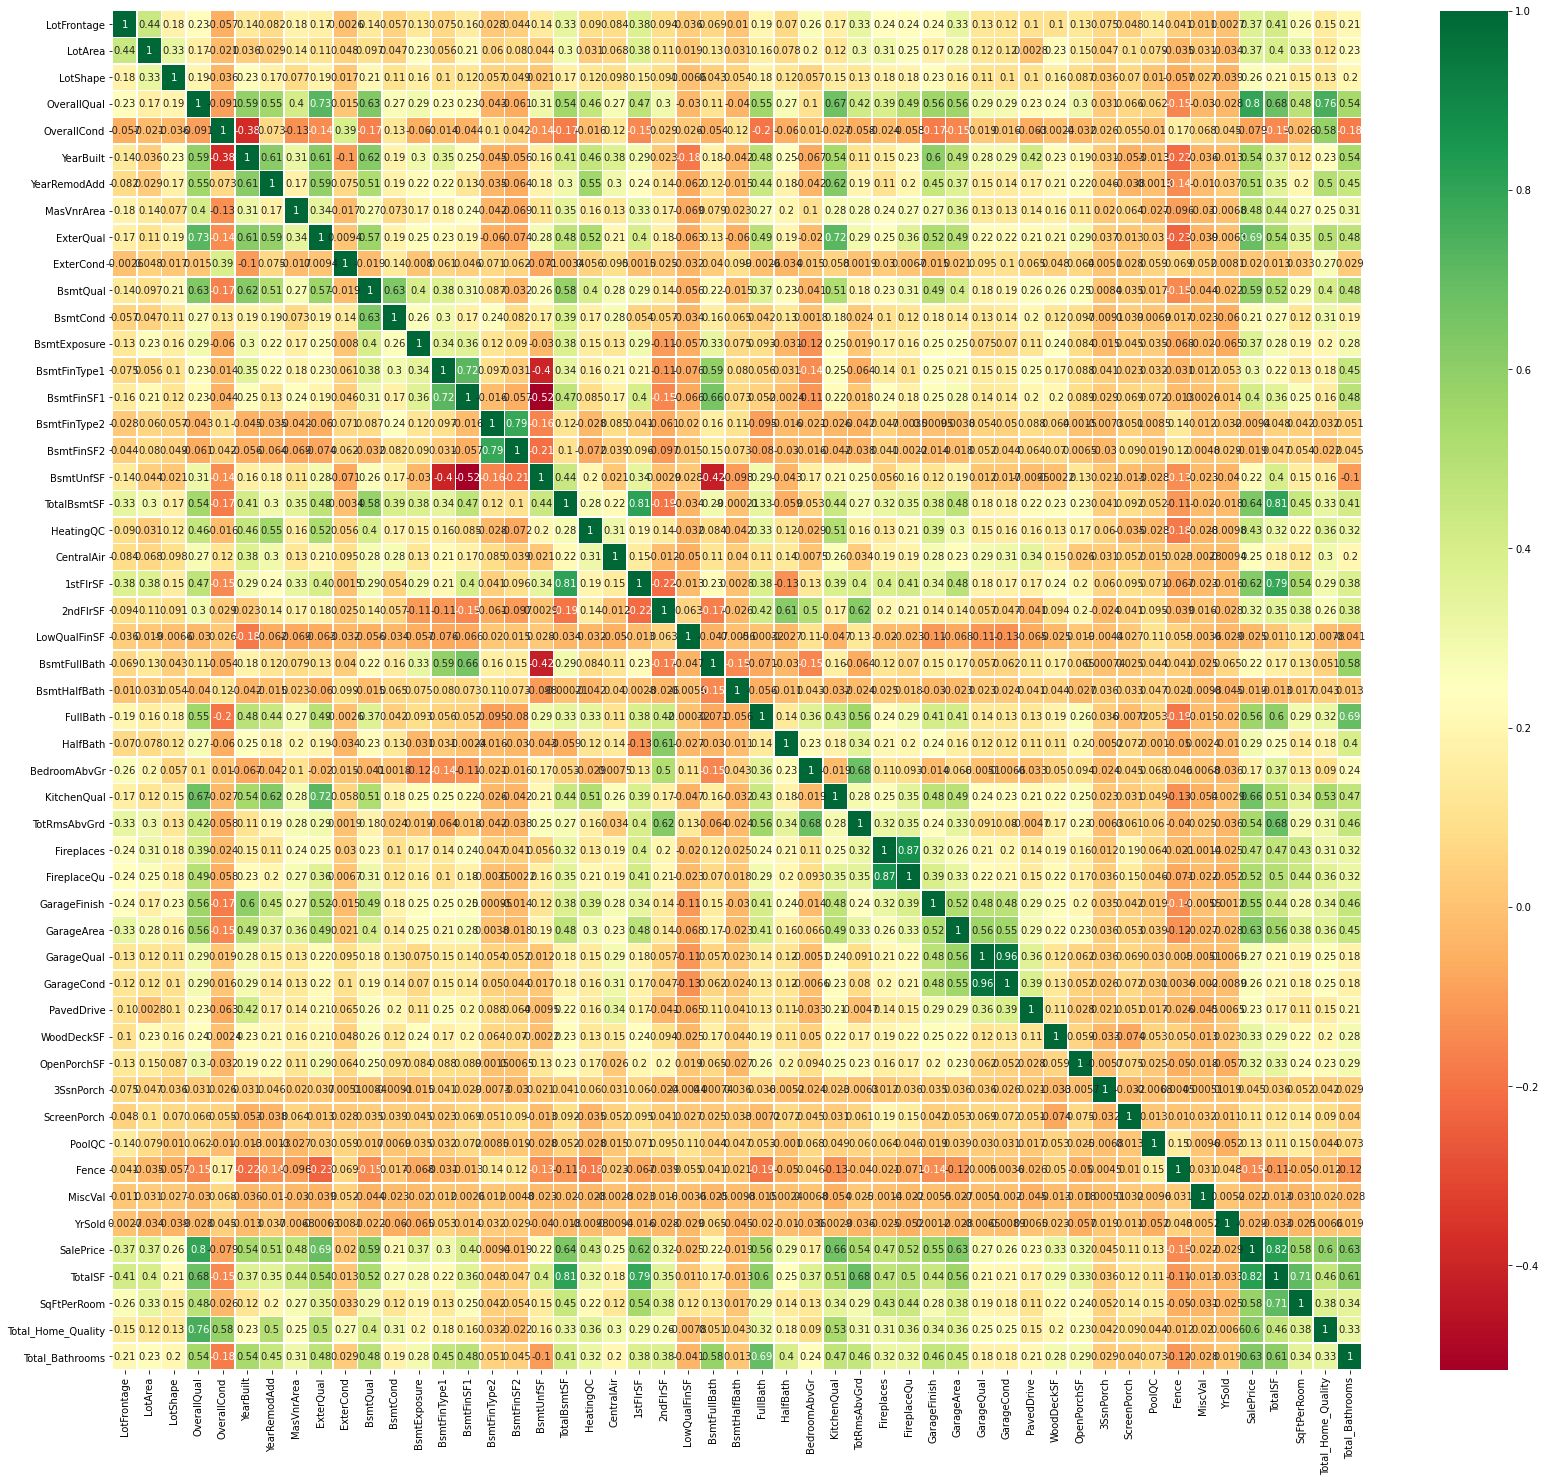

In [21]:
plt.subplots(figsize=(28,25))
sns.heatmap(df.corr(), annot=True, linewidths=.5,cmap = "RdYlGn");

In [22]:
categorical_columns = [column for column in df.columns if df.dtypes[column] == 'object']

feature_scale = [feature for feature in df.columns if feature not in categorical_columns]

scaler = StandardScaler()
scaler.fit(df[feature_scale])

scaled_data = pd.concat([df[categorical_columns].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [23]:
df = pd.get_dummies(scaled_data, columns = categorical_columns, drop_first=True)
df.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscVal,YrSold,SalePrice,TotalSF,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalGarageQual_ExTA,TotalGarageQual_FaFa,TotalGarageQual_FaPo,TotalGarageQual_FaTA,TotalGarageQual_GdGd,TotalGarageQual_GdTA,TotalGarageQual_NoneNone,TotalGarageQual_PoPo,TotalGarageQual_TAFa,TotalGarageQual_TAGd,TotalGarageQual_TATA,Haspool_Y,Has2ndfloor_Y,Hasgarage_Y,Hasbsmt_Y,Hasfireplace_Y
0,-0.256705,-0.292989,-0.702823,0.655043,-0.515929,1.074098,0.880128,0.520741,1.0548,-0.238631,0.585303,0.118131,-0.586191,1.167526,0.616203,-0.275208,-0.287479,-0.945995,-0.471071,0.891044,0.264394,-0.807777,1.160888,-0.120493,1.124684,-0.239992,0.792389,1.225142,0.165246,0.738465,0.919019,-0.951126,-1

In [24]:
# ****MODELLEME

In [25]:
y = df[['SalePrice']]
X = df.drop("SalePrice", axis=1)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state =42)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor 
from lightgbm import LGBMRegressor 
from sklearn.linear_model import LinearRegression 
from xgboost import XGBRegressor 
from catboost import CatBoostRegressor

Regressors = [ DecisionTreeRegressor(), 
              CatBoostRegressor(), LinearRegression(), XGBRegressor(), LGBMRegressor(), RandomForestRegressor(),
              AdaBoostRegressor(), GradientBoostingRegressor()]

log_cols=["Regressors", "Accuracy", "Log Loss"] 
log = pd.DataFrame(columns=log_cols)

for clf in Regressors: 
    
    clf.fit(X_train, y_train) 
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Validation Results****')
    test_predictions = clf.predict(X_val)

    mse = mean_squared_error(y_val, test_predictions)
    print("mse - score : {:.4%}".format(mse))

    rmse = math.sqrt(mean_squared_error(y_val, test_predictions))
    print("rmse - score : {:.4%}".format(rmse))

    mae = mean_absolute_error(y_val, test_predictions)
    print("mae - score : {:.4%}".format(mae) )

DecisionTreeRegressor
****Validation Results****
mse - score : 22.6237%
rmse - score : 47.5644%
mae - score : 30.6846%
Learning rate set to 0.040094
0:	learn: 0.9818951	total: 63.5ms	remaining: 1m 3s
1:	learn: 0.9568471	total: 70ms	remaining: 34.9s
2:	learn: 0.9336152	total: 76.1ms	remaining: 25.3s
3:	learn: 0.9085343	total: 82.4ms	remaining: 20.5s
4:	learn: 0.8857671	total: 88.6ms	remaining: 17.6s
5:	learn: 0.8648717	total: 94.9ms	remaining: 15.7s
6:	learn: 0.8446403	total: 101ms	remaining: 14.4s
7:	learn: 0.8238129	total: 108ms	remaining: 13.4s
8:	learn: 0.8060707	total: 114ms	remaining: 12.6s
9:	learn: 0.7875257	total: 120ms	remaining: 11.9s
10:	learn: 0.7687166	total: 126ms	remaining: 11.4s
11:	learn: 0.7515306	total: 132ms	remaining: 10.9s
12:	learn: 0.7351863	total: 139ms	remaining: 10.5s
13:	learn: 0.7174505	total: 145ms	remaining: 10.2s
14:	learn: 0.7020636	total: 151ms	remaining: 9.9s
15:	learn: 0.6868591	total: 157ms	remaining: 9.65s
16:	learn: 0.6706190	total: 163ms	remainin

In [28]:
cb = CatBoostRegressor(loss_function='MSE')
param_grid = {
    'n_estimators' : [500,750,1000],
    'learning_rate' : [0.01, 0.1,0.5],
    'random_strength' : [1, 2, 5],
    'max_depth' : [4,6, 7, 9],
    'min_child_samples' : [2, 5, 10]}

catboost = RandomizedSearchCV(estimator = cb, param_distributions = param_grid,n_iter = 500,
                               scoring = 'neg_root_mean_squared_error',
                              cv = 5, verbose = 10 , n_jobs = -1)

#catboost_search = catboost.fit(X_train, y_train)
#print(catboost_search.best_score_)
#print(catboost_search.best_params_)

****Model için en uygun parametreler bulundu

In [29]:
model_cb = CatBoostRegressor(n_estimators = 750 ,learning_rate =0.1,random_strength =5, max_depth =4 ,min_child_samples=5)

In [30]:
model_cb.fit(X_train, y_train)
cb_pred = model_cb.predict(X_val)

0:	learn: 0.9513792	total: 7.76ms	remaining: 5.82s
1:	learn: 0.8966234	total: 13.5ms	remaining: 5.07s
2:	learn: 0.8680509	total: 19.8ms	remaining: 4.94s
3:	learn: 0.8330621	total: 25.6ms	remaining: 4.77s
4:	learn: 0.7989198	total: 31.7ms	remaining: 4.72s
5:	learn: 0.7543708	total: 38.3ms	remaining: 4.75s
6:	learn: 0.7227646	total: 44.7ms	remaining: 4.75s
7:	learn: 0.6930127	total: 51.1ms	remaining: 4.74s
8:	learn: 0.6729056	total: 57.7ms	remaining: 4.75s
9:	learn: 0.6473021	total: 63.9ms	remaining: 4.73s
10:	learn: 0.6236170	total: 69.7ms	remaining: 4.68s
11:	learn: 0.5982524	total: 75.4ms	remaining: 4.64s
12:	learn: 0.5819619	total: 81.7ms	remaining: 4.63s
13:	learn: 0.5697147	total: 87.4ms	remaining: 4.59s
14:	learn: 0.5559568	total: 93.2ms	remaining: 4.57s
15:	learn: 0.5404649	total: 98.8ms	remaining: 4.53s
16:	learn: 0.5271881	total: 104ms	remaining: 4.49s
17:	learn: 0.5120045	total: 110ms	remaining: 4.47s
18:	learn: 0.4993314	total: 116ms	remaining: 4.45s
19:	learn: 0.4877298	tota

In [31]:
print(mean_squared_error(y_val, cb_pred))

0.07121644749388291


****